In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import json

In [14]:
import matplotlib.pyplot as plt

In [15]:
import src
from src.data import load_ephys

In [22]:
dates = [
    '2022-07-27', '2022-07-28', '2022-08-01',
    '2022-08-03', '2022-08-04', '2022-08-06',
    '2022-08-08', '2022-08-10', '2022-08-11',
    '2022-08-12', '2022-08-13', '2022-08-15',
    '2022-09-12', '2022-09-14', '2022-09-16',
]

# LFP strength for minutes 5, 10, 15, 20, 25

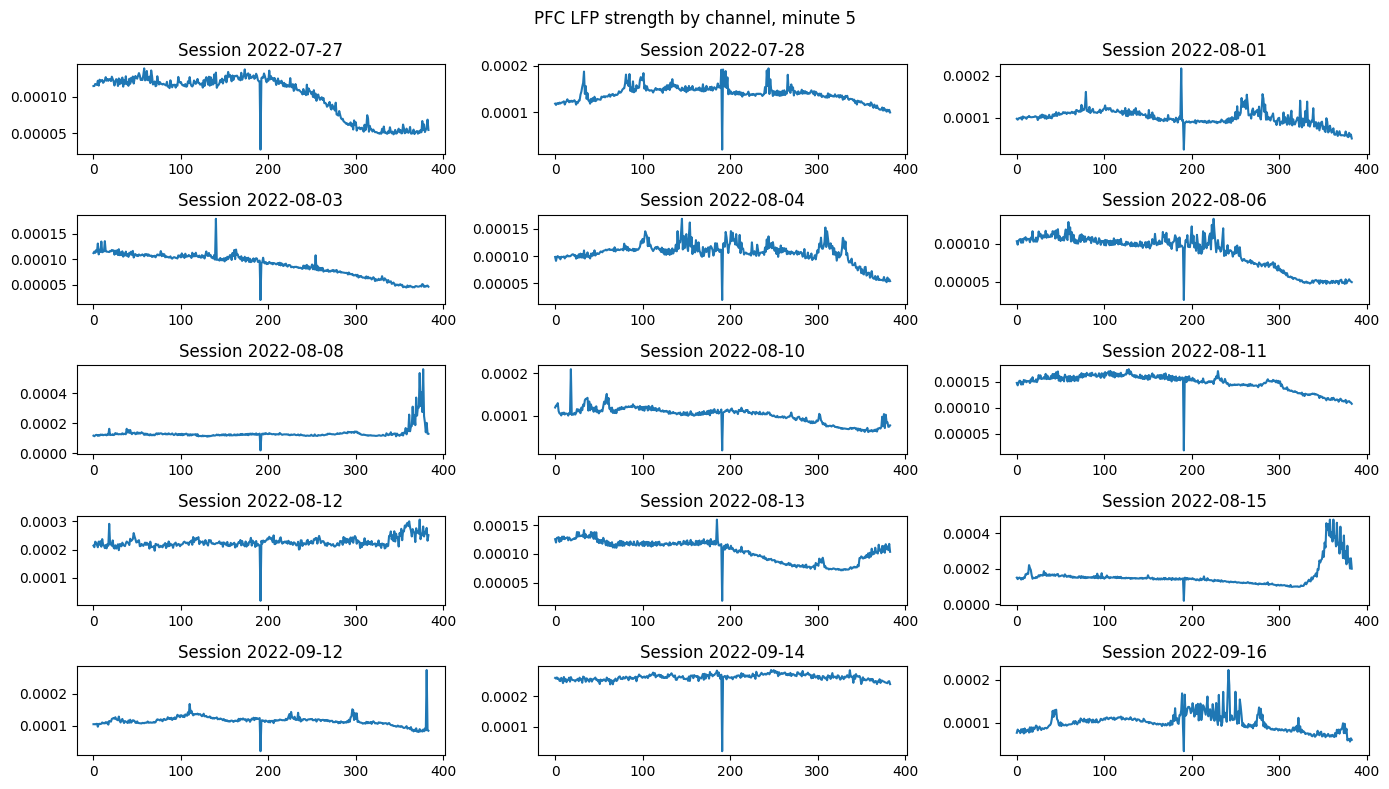

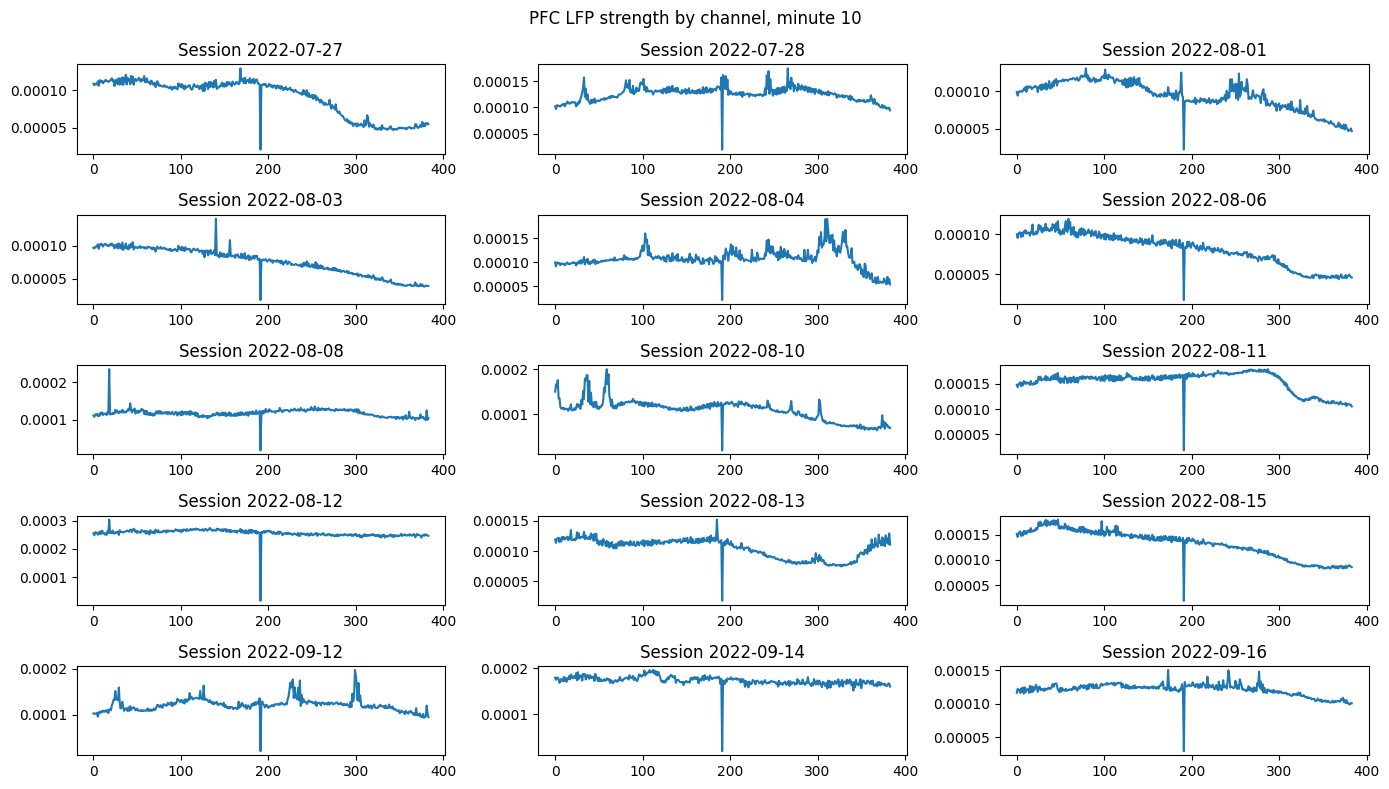

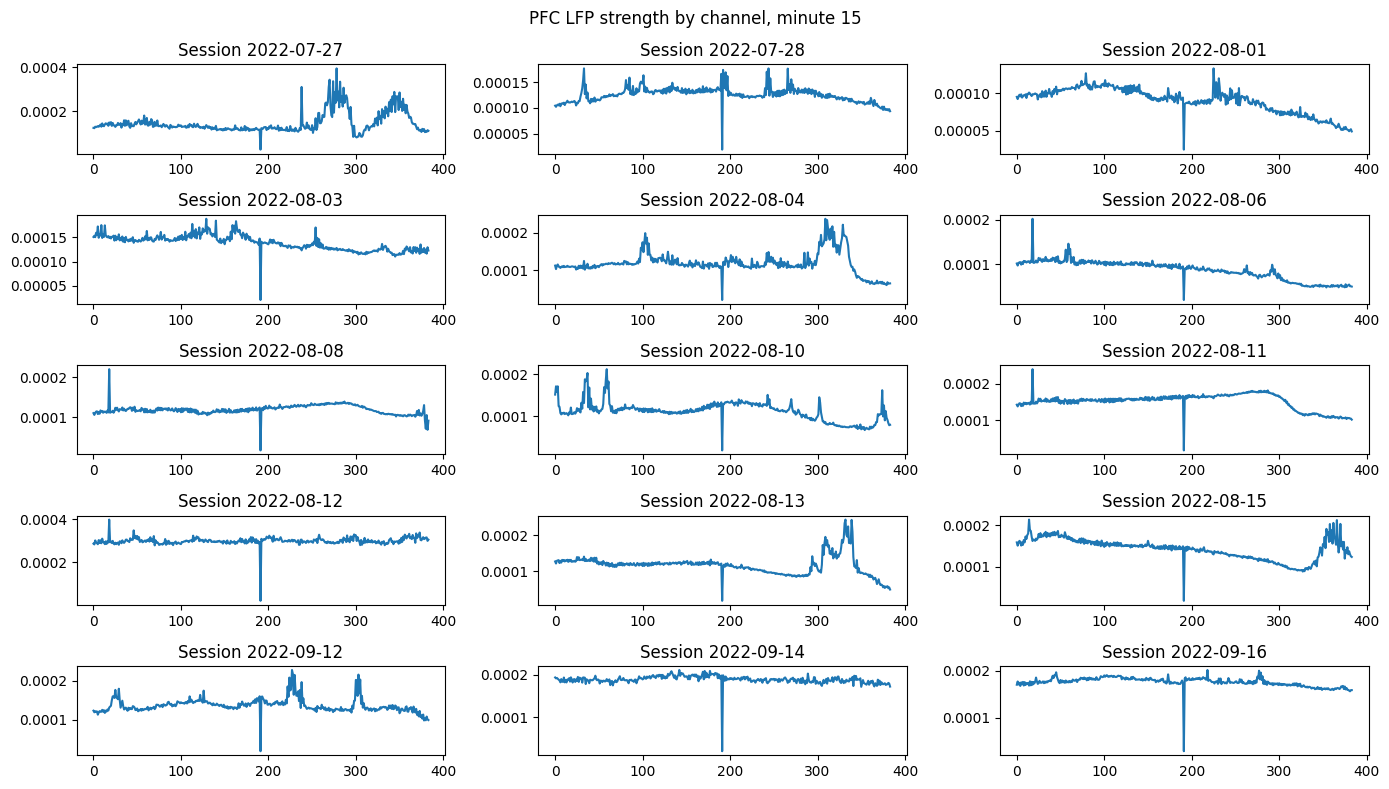

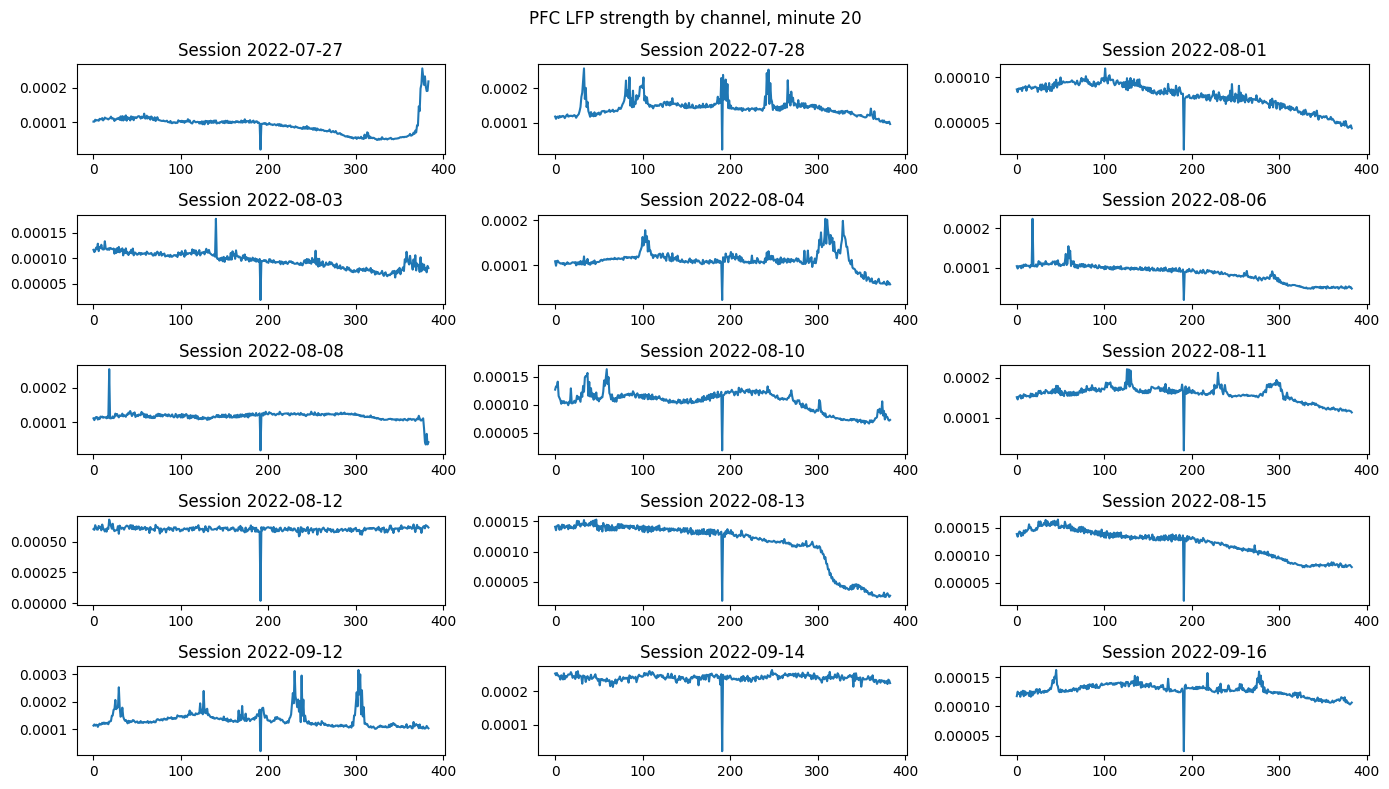

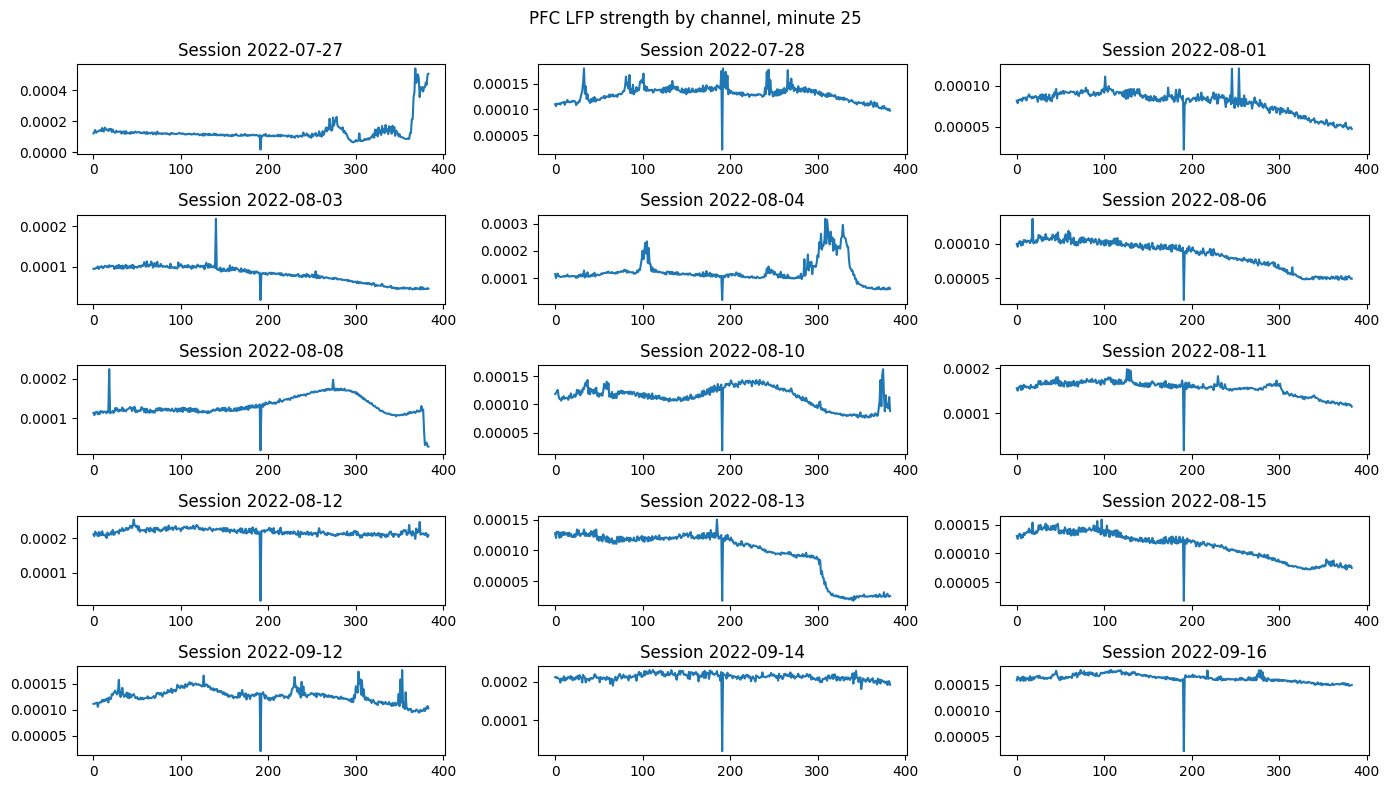

In [80]:
for region in ['pfc']:
    for minute in [5, 10, 15, 20, 25]:
        fig, ax = plt.subplots(5, 3, figsize=(14, 8))
        plt.suptitle(f'{region.upper()} LFP strength by channel, minute {minute}')
        for i, date in enumerate(dates):
            plt.sca(ax.flat[i])
            plt.title(f'Session {date}')

            ext = {'hpc': 'imec1', 'pfc': 'imec0'}[region]
            file = str(src.paths.session_path(date)) + f'.{ext}.lf.bin'
            path = src.paths.DATA / date / file
            raw = load_ephys(path, startmin=minute, endmin=minute + 1)
            X = raw - raw.mean(axis=0)
            plt.plot(X.std(axis=0))

        plt.tight_layout()
        plt.savefig(f'lfp-{region}-minute-{minute}.png', dpi=100)
        plt.show()

# LFP strength for entire 2022-08-13 session

In [50]:
import numpy as np
import tqdm

In [51]:
date = '2022-08-13'

In [54]:
std = np.zeros((120, 384))

In [56]:
for minute in tqdm.tqdm(range(120)):
    file = str(src.paths.session_path(date)) + '.imec1.lf.bin'
    path = src.paths.DATA / date / file
    X = load_ephys(path, startmin=minute, endmin=minute + 1)
    X = X - X.mean(axis=0)
    std[minute] = X.std(axis=0)

100%|██████████| 120/120 [02:51<00:00,  1.43s/it]


(-0.5, 383.5, 119.5, -0.5)

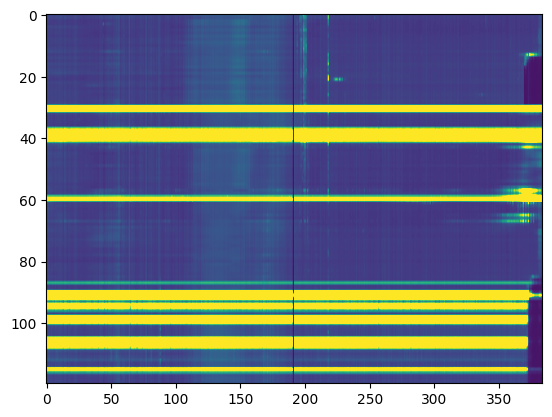

In [69]:
plt.imshow(std, cmap='viridis', vmin=0, vmax=0.0005)
plt.axis('auto')

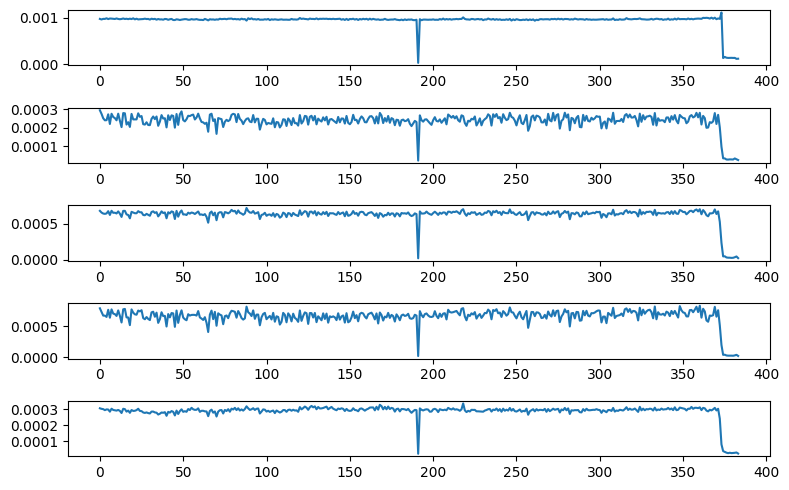

In [76]:
fig, ax = plt.subplots(5, 1, figsize=(8, 5))
for i, minute in enumerate(range(92, 97)):
    plt.sca(ax.flat[i])
    plt.plot(std[minute])
plt.tight_layout()
plt.show()